#     <h1> Tropical Cyclone Weather Analysis between Southern and Northern India <h1>
   

<h3><bold>Objective:</bold></h3>
    <p> Predict whether a tropical cyclone will have a significant impact (e.g., high wind speed, heavy rainfall) based on various features, and compare the performance of the model for Southern and Northern India.</p>

<h4> Data Loading and Preprocessing: </h4>
<h5> Import Datset </h5>

In [45]:

import numpy as np
import pandas as pd
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

In [46]:
NI_List_df = pd.read_csv('input/NI_list_v04r00.csv', index_col='SEASON')

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\342128028.py:1: DtypeWarning: Columns (161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  NI_List_df = pd.read_csv('input/NI_list_v04r00.csv', index_col='SEASON')


In [47]:
SI_List_df = pd.read_csv('input/SI_list_v04r00.csv', index_col='SEASON')

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2307579449.py:1: DtypeWarning: Columns (19,20,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  SI_List_df = pd.read_csv('input/SI_list_v04r00.csv', index_col='SEASON')


In [48]:
NI_df = NI_List_df[['BASIN','SUBBASIN', 'NAME', 'ISO_TIME', 'LAT', 'LON','DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES', 'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'NEWDELHI_GRADE' ,'REUNION_TYPE', 'REUNION_WIND', 'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR']].copy()

In [49]:
SI_df = SI_List_df[['BASIN','SUBBASIN', 'NAME', 'ISO_TIME', 'LAT', 'LON','DIST2LAND', 'LANDFALL','WMO_WIND', 'WMO_PRES', 'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'NEWDELHI_GRADE' ,'REUNION_TYPE', 'REUNION_WIND', 'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR']].copy()

In [50]:
NI_df2 = NI_df.loc[2015:2023]
SI_df2 = SI_df.loc[2015:2023]

In [51]:

print(NI_df2.isnull().sum())
print('*'*25)
print(SI_df2.isnull().sum())


BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
LAT               0
LON               0
DIST2LAND         0
LANDFALL          0
WMO_WIND          0
WMO_PRES          0
NEWDELHI_WIND     0
NEWDELHI_PRES     0
NEWDELHI_DP       0
NEWDELHI_GRADE    0
REUNION_TYPE      0
REUNION_WIND      0
REUNION_PRES      0
REUNION_RMW       0
STORM_SPEED       0
STORM_DIR         0
dtype: int64
*************************
BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
LAT               0
LON               0
DIST2LAND         0
LANDFALL          0
WMO_WIND          0
WMO_PRES          0
NEWDELHI_WIND     0
NEWDELHI_PRES     0
NEWDELHI_DP       0
NEWDELHI_GRADE    0
REUNION_TYPE      0
REUNION_WIND      0
REUNION_PRES      0
REUNION_RMW       0
STORM_SPEED       0
STORM_DIR         0
dtype: int64


In [52]:
SEASONS  = [2023,2022, 2021,2020,2019,2018,2017,2016, 2015]
BASINS = ['NI', 'SI']
SUBBASINS = ['BB', 'AS','MM']

In [53]:

Weather_Analysis_NI_df1 = NI_df2[NI_df2.BASIN.isin(BASINS)]
Weather_Analysis_NI_df1 = Weather_Analysis_NI_df1[Weather_Analysis_NI_df1.SUBBASIN.isin(SUBBASINS)]

In [54]:
Weather_Analysis_NI_df1= Weather_Analysis_NI_df1.fillna(0)
Weather_Analysis_NI_df1.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,NEWDELHI_GRADE,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR
SEASON,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601,,,,,,,,,,,7,8
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584,,,,,,,,,,,7,8
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571,,,,,,,,,,,7,3
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551,,,,,,,,,,,7,0
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538,,,,,,,,,,,7,358


In [55]:

Weather_Analysis_SI_df1 = SI_df2[SI_df2.BASIN.isin(BASINS)]
Weather_Analysis_SI_df1 = Weather_Analysis_SI_df1[Weather_Analysis_SI_df1.SUBBASIN.isin(SUBBASINS)]

In [56]:
Weather_Analysis_SI_df1 = Weather_Analysis_SI_df1.fillna(0)
Weather_Analysis_SI_df1.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,NEWDELHI_GRADE,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR
SEASON,,,,,,,,,,,,,,,,,,,,
2015,SI,MM,ADJALI,15-11-2014 00:00,-6.00000,66.0000,1815,1796,,,,,,,,,,,5,176
2015,SI,MM,ADJALI,15-11-2014 03:00,-6.24000,66.0025,1796,1772,,,,,,,,,,,6,170
2015,SI,MM,ADJALI,15-11-2014 06:00,-6.55000,66.1000,1772,1743,,1009,,,,,1,,1009,,6,170
2015,SI,MM,ADJALI,15-11-2014 09:00,-6.79250,66.0967,1743,1723,,,,,,,1,,1008,,5,183
2015,SI,MM,ADJALI,15-11-2014 12:00,-7.01429,66.0857,1723,1704,20,1007,,,,,1,20,1007,,4,186


In [57]:
Weather_Analysis_SI_df1['STORM_SPEED'] = pd.to_numeric(Weather_Analysis_SI_df1['STORM_SPEED'],errors='coerce')
Weather_Analysis_SI_df1['STORM_DIR'] =  pd.to_numeric(Weather_Analysis_SI_df1['STORM_DIR'], errors='coerce')
Weather_Analysis_SI_df1['WMO_WIND'] =  pd.to_numeric(Weather_Analysis_SI_df1['WMO_WIND'], errors='coerce')
Weather_Analysis_SI_df1['WMO_PRES'] =  pd.to_numeric(Weather_Analysis_SI_df1['WMO_PRES'], errors='coerce')
Weather_Analysis_SI_df1['LANDFALL'] =  pd.to_numeric(Weather_Analysis_SI_df1['LANDFALL'], errors='coerce')
Weather_Analysis_SI_df1['DIST2LAND'] =  pd.to_numeric(Weather_Analysis_SI_df1['DIST2LAND'], errors='coerce')
Weather_Analysis_SI_df1['NEWDELHI_WIND'] = pd.to_numeric(Weather_Analysis_SI_df1['NEWDELHI_WIND'],errors='coerce')
Weather_Analysis_SI_df1['NEWDELHI_PRES'] =  pd.to_numeric(Weather_Analysis_SI_df1['NEWDELHI_PRES'], errors='coerce')
Weather_Analysis_SI_df1['NEWDELHI_DP'] =  pd.to_numeric(Weather_Analysis_SI_df1['NEWDELHI_PRES'], errors='coerce')
Weather_Analysis_SI_df1['REUNION_WIND'] =  pd.to_numeric(Weather_Analysis_SI_df1['REUNION_WIND'], errors='coerce')
Weather_Analysis_SI_df1['REUNION_PRES'] =  pd.to_numeric(Weather_Analysis_SI_df1['REUNION_PRES'], errors='coerce')
Weather_Analysis_SI_df1['REUNION_RMW'] =  pd.to_numeric(Weather_Analysis_SI_df1['REUNION_RMW'], errors='coerce')


In [58]:
Weather_Analysis_NI_df1['STORM_SPEED'] = pd.to_numeric(Weather_Analysis_NI_df1['STORM_SPEED'],errors='coerce')
Weather_Analysis_NI_df1['STORM_DIR'] =  pd.to_numeric(Weather_Analysis_NI_df1['STORM_DIR'], errors='coerce')
Weather_Analysis_NI_df1['WMO_WIND'] =  pd.to_numeric(Weather_Analysis_NI_df1['WMO_WIND'], errors='coerce')
Weather_Analysis_NI_df1['WMO_PRES'] =  pd.to_numeric(Weather_Analysis_NI_df1['WMO_PRES'], errors='coerce')
Weather_Analysis_NI_df1['LANDFALL'] =  pd.to_numeric(Weather_Analysis_NI_df1['LANDFALL'], errors='coerce')
Weather_Analysis_NI_df1['DIST2LAND'] =  pd.to_numeric(Weather_Analysis_NI_df1['DIST2LAND'], errors='coerce')
Weather_Analysis_NI_df1['NEWDELHI_WIND'] = pd.to_numeric(Weather_Analysis_NI_df1['NEWDELHI_WIND'],errors='coerce')
Weather_Analysis_NI_df1['NEWDELHI_PRES'] =  pd.to_numeric(Weather_Analysis_NI_df1['NEWDELHI_PRES'], errors='coerce')
Weather_Analysis_NI_df1['NEWDELHI_DP'] =  pd.to_numeric(Weather_Analysis_NI_df1['NEWDELHI_PRES'], errors='coerce')
Weather_Analysis_NI_df1['REUNION_WIND'] =  pd.to_numeric(Weather_Analysis_NI_df1['REUNION_WIND'], errors='coerce')
Weather_Analysis_NI_df1['REUNION_PRES'] =  pd.to_numeric(Weather_Analysis_NI_df1['REUNION_PRES'], errors='coerce')
Weather_Analysis_NI_df1['REUNION_RMW'] =  pd.to_numeric(Weather_Analysis_NI_df1['REUNION_RMW'], errors='coerce')

In [59]:
#'Formatted Date' transformation:

Weather_Analysis_NI_df1['Date'] = pd.to_datetime(Weather_Analysis_NI_df1['ISO_TIME'])
Weather_Analysis_NI_df1['year'] = Weather_Analysis_NI_df1['Date'].dt.year
Weather_Analysis_NI_df1['month'] = Weather_Analysis_NI_df1['Date'].dt.month
Weather_Analysis_NI_df1['day'] = Weather_Analysis_NI_df1['Date'].dt.day
Weather_Analysis_NI_df1['Time'] = Weather_Analysis_NI_df1['Date'].dt.time
Weather_Analysis_NI_df1['hour'] = Weather_Analysis_NI_df1['Date'].dt.hour
Weather_Analysis_NI_df1.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 06:00:00,2015,6,6,06:00:00,6
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 09:00:00,2015,6,6,09:00:00,9
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,NaN,NaN,...,NaN,NaN,7,3,2015-06-06 12:00:00,2015,6,6,12:00:00,12
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,NaN,NaN,...,NaN,NaN,7,0,2015-06-06 15:00:00,2015,6,6,15:00:00,15
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,NaN,NaN,...,NaN,NaN,7,358,2015-06-06 18:00:00,2015,6,6,18:00:00,18


In [60]:
#'Formatted Date' transformation:

Weather_Analysis_SI_df1['Date'] = pd.to_datetime(Weather_Analysis_SI_df1['ISO_TIME'])
Weather_Analysis_SI_df1['year'] = Weather_Analysis_SI_df1['Date'].dt.year
Weather_Analysis_SI_df1['month'] = Weather_Analysis_SI_df1['Date'].dt.month
Weather_Analysis_SI_df1['day'] = Weather_Analysis_SI_df1['Date'].dt.day
Weather_Analysis_SI_df1['Time'] = Weather_Analysis_SI_df1['Date'].dt.time
Weather_Analysis_SI_df1['hour'] = Weather_Analysis_SI_df1['Date'].dt.hour
Weather_Analysis_SI_df1.head()

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\3818366693.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Weather_Analysis_SI_df1['Date'] = pd.to_datetime(Weather_Analysis_SI_df1['ISO_TIME'])


,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,SI,MM,ADJALI,15-11-2014 00:00,-6.00000,66.0000,1815,1796.0,NaN,NaN,...,NaN,NaN,5,176,2014-11-15 00:00:00,2014,11,15,00:00:00,0
2015,SI,MM,ADJALI,15-11-2014 03:00,-6.24000,66.0025,1796,1772.0,NaN,NaN,...,NaN,NaN,6,170,2014-11-15 03:00:00,2014,11,15,03:00:00,3
2015,SI,MM,ADJALI,15-11-2014 06:00,-6.55000,66.1000,1772,1743.0,NaN,1009.0,...,1009.0,NaN,6,170,2014-11-15 06:00:00,2014,11,15,06:00:00,6
2015,SI,MM,ADJALI,15-11-2014 09:00,-6.79250,66.0967,1743,1723.0,NaN,NaN,...,1008.0,NaN,5,183,2014-11-15 09:00:00,2014,11,15,09:00:00,9
2015,SI,MM,ADJALI,15-11-2014 12:00,-7.01429,66.0857,1723,1704.0,20.0,1007.0,...,1007.0,NaN,4,186,2014-11-15 12:00:00,2014,11,15,12:00:00,12


In [61]:
Weather_Analysis_NI_df1 = Weather_Analysis_NI_df1.fillna(method='ffill')

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\813549826.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Weather_Analysis_NI_df1 = Weather_Analysis_NI_df1.fillna(method='ffill')


In [186]:
Weather_Analysis_NI_df1.dropna()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
SEASON,,,,,,,,,,,,,,,,,,,,,


In [188]:
Weather_Analysis_SI_df1.isnull().sum()

BASIN                0
SUBBASIN             0
NAME                 0
ISO_TIME             0
LAT                  0
LON                  0
DIST2LAND            0
LANDFALL            91
WMO_WIND          3959
WMO_PRES          4000
NEWDELHI_WIND     6384
NEWDELHI_PRES     6384
NEWDELHI_DP       6384
NEWDELHI_GRADE       0
REUNION_TYPE         0
REUNION_WIND      1593
REUNION_PRES      1673
REUNION_RMW       4542
STORM_SPEED          0
STORM_DIR            0
Date                 0
year                 0
month                0
day                  0
Time                 0
hour                 0
dtype: int64

In [189]:
Weather_Analysis_NI_df1.isnull().sum()

BASIN                0
SUBBASIN             0
NAME                 0
ISO_TIME             0
LAT                  0
LON                  0
DIST2LAND            0
LANDFALL             0
WMO_WIND             7
WMO_PRES             7
NEWDELHI_WIND        7
NEWDELHI_PRES        7
NEWDELHI_DP          7
NEWDELHI_GRADE       0
REUNION_TYPE         0
REUNION_WIND      2916
REUNION_PRES      2916
REUNION_RMW       2916
STORM_SPEED          0
STORM_DIR            0
Date                 0
year                 0
month                0
day                  0
Time                 0
hour                 0
dtype: int64

In [190]:
Weather_Analysis_NI_df1.apply(lambda x: (x == 9999).sum())

BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
LAT               0
LON               0
DIST2LAND         0
LANDFALL          0
WMO_WIND          0
WMO_PRES          0
NEWDELHI_WIND     0
NEWDELHI_PRES     0
NEWDELHI_DP       0
NEWDELHI_GRADE    0
REUNION_TYPE      0
REUNION_WIND      0
REUNION_PRES      0
REUNION_RMW       0
STORM_SPEED       0
STORM_DIR         0
Date              0
year              0
month             0
day               0
Time              0
hour              0
dtype: int64

In [191]:
Weather_Analysis_SI_df1.apply(lambda x: (x == 9999).sum())

BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
LAT               0
LON               0
DIST2LAND         0
LANDFALL          0
WMO_WIND          0
WMO_PRES          0
NEWDELHI_WIND     0
NEWDELHI_PRES     0
NEWDELHI_DP       0
NEWDELHI_GRADE    0
REUNION_TYPE      0
REUNION_WIND      0
REUNION_PRES      0
REUNION_RMW       0
STORM_SPEED       0
STORM_DIR         0
Date              0
year              0
month             0
day               0
Time              0
hour              0
dtype: int64

In [208]:
weather_merged_df = pd.concat([Weather_Analysis_NI_df1,Weather_Analysis_SI_df1])

In [209]:
weather_merged_df['STORM_SPEED'] = pd.to_numeric(weather_merged_df['STORM_SPEED'],errors='coerce')
weather_merged_df['STORM_DIR'] =  pd.to_numeric(weather_merged_df['STORM_DIR'], errors='coerce')
weather_merged_df['WMO_WIND'] =  pd.to_numeric(weather_merged_df['WMO_WIND'], errors='coerce')
weather_merged_df['WMO_PRES'] =  pd.to_numeric(weather_merged_df['WMO_PRES'], errors='coerce')
weather_merged_df['LANDFALL'] =  pd.to_numeric(weather_merged_df['LANDFALL'], errors='coerce')
weather_merged_df['DIST2LAND'] =  pd.to_numeric(weather_merged_df['DIST2LAND'], errors='coerce')
weather_merged_df['NEWDELHI_WIND'] = pd.to_numeric(weather_merged_df['NEWDELHI_WIND'],errors='coerce')
weather_merged_df['NEWDELHI_PRES'] =  pd.to_numeric(weather_merged_df['NEWDELHI_PRES'], errors='coerce')
weather_merged_df['NEWDELHI_DP'] =  pd.to_numeric(weather_merged_df['NEWDELHI_PRES'], errors='coerce')
weather_merged_df['REUNION_WIND'] =  pd.to_numeric(weather_merged_df['REUNION_WIND'], errors='coerce')
weather_merged_df['REUNION_PRES'] =  pd.to_numeric(weather_merged_df['REUNION_PRES'], errors='coerce')
weather_merged_df['REUNION_RMW'] =  pd.to_numeric(weather_merged_df['REUNION_RMW'], errors='coerce')

In [210]:
weather_merged_df 

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.1000,68.5000,624,601.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 06:00:00,2015,6,6,06:00:00,6
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.4500,68.5599,597,584.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 09:00:00,2015,6,6,09:00:00,9
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.8000,68.6000,584,571.0,NaN,NaN,...,NaN,NaN,7,3,2015-06-06 12:00:00,2015,6,6,12:00:00,12
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.1500,68.6075,566,551.0,NaN,NaN,...,NaN,NaN,7,0,2015-06-06 15:00:00,2015,6,6,15:00:00,15
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.5000,68.6000,551,538.0,NaN,NaN,...,NaN,NaN,7,358,2015-06-06 18:00:00,2015,6,6,18:00:00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,SI,MM,FABIEN,22-05-2023 06:00,-11.8000,69.0000,1523,1502.0,NaN,NaN,...,NaN,NaN,6,172,2023-05-22 06:00:00,2023,5,22,06:00:00,6
2023,SI,MM,FABIEN,22-05-2023 09:00,-12.1850,69.0700,1503,1483.0,NaN,NaN,...,NaN,NaN,8,166,2023-05-22 09:00:00,2023,5,22,09:00:00,9
2023,SI,MM,FABIEN,22-05-2023 12:00,-12.6000,69.2000,1485,1479.0,NaN,NaN,...,NaN,NaN,8,157,2023-05-22 12:00:00,2023,5,22,12:00:00,12


In [213]:
import re

In [214]:
# NI - North Indian
# SI - South Indian
# BB - Bay of Bengal
# AS - Arabian Sea
# DS - Disturbance
# TS - Tropical
# ET - Extratropical
# SS - Subtropical
# NR - Not reported
# MX - Mixture (contradicting nature reports from different agencies)

for column in weather_merged_df.columns:
    missing_cnt = weather_merged_df[column][weather_merged_df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(weather_merged_df[column][weather_merged_df[column] != -999 ].mean())
#         print("mean",mean)
        index = weather_merged_df.loc[weather_merged_df[column] == -999 , column].index
#         print("index" , index )
        weather_merged_df.loc[weather_merged_df[column] == -999 , column] = mean
#         print(df.loc[index , column])


Missing Values in column BASIN =  0
Missing Values in column SUBBASIN =  0
Missing Values in column NAME =  0
Missing Values in column ISO_TIME =  0
Missing Values in column LAT =  0
Missing Values in column LON =  0
Missing Values in column DIST2LAND =  0
Missing Values in column LANDFALL =  0
Missing Values in column WMO_WIND =  0
Missing Values in column WMO_PRES =  0
Missing Values in column NEWDELHI_WIND =  0
Missing Values in column NEWDELHI_PRES =  0
Missing Values in column NEWDELHI_DP =  0
Missing Values in column NEWDELHI_GRADE =  0
Missing Values in column REUNION_TYPE =  0
Missing Values in column REUNION_WIND =  0
Missing Values in column REUNION_PRES =  0
Missing Values in column REUNION_RMW =  0
Missing Values in column STORM_SPEED =  0
Missing Values in column STORM_DIR =  0
Missing Values in column Date =  0
Missing Values in column year =  0
Missing Values in column month =  0
Missing Values in column day =  0
Missing Values in column Time =  0
Missing Values in colum

In [215]:
#Categorical variables:
categorical = weather_merged_df.select_dtypes(include = ["object"]).keys()
print(categorical)



Index(['BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NEWDELHI_GRADE',
       'REUNION_TYPE', 'Time'],
      dtype='object')


In [216]:
quantitative = weather_merged_df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['LAT', 'LON', 'DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES',
       'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'REUNION_WIND',
       'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR'],
      dtype='object')


In [217]:
weather_merged_df['Time'] = weather_merged_df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
weather_merged_df['Time'] = weather_merged_df['Time'].apply(hhmm)

#Convert the column into Datetime.
weather_merged_df['Time'] = pd.to_datetime(weather_merged_df['Time']).dt.time

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\1773257916.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_merged_df['Time'] = pd.to_datetime(weather_merged_df['Time']).dt.time


In [218]:
weather_merged_df.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 06:00:00,2015,6,6,06:00:00,6
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,NaN,NaN,...,NaN,NaN,7,8,2015-06-06 09:00:00,2015,6,6,09:00:00,9
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,NaN,NaN,...,NaN,NaN,7,3,2015-06-06 12:00:00,2015,6,6,12:00:00,12
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,NaN,NaN,...,NaN,NaN,7,0,2015-06-06 15:00:00,2015,6,6,15:00:00,15
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,NaN,NaN,...,NaN,NaN,7,358,2015-06-06 18:00:00,2015,6,6,18:00:00,18


In [219]:
weather_merged_df[categorical]

,BASIN,SUBBASIN,NAME,ISO_TIME,NEWDELHI_GRADE,REUNION_TYPE,Time
SEASON,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,,,06:00:00
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,,,09:00:00
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,,,12:00:00
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,,,15:00:00
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,,,18:00:00
...,...,...,...,...,...,...,...
2023,SI,MM,FABIEN,22-05-2023 06:00,,,06:00:00
2023,SI,MM,FABIEN,22-05-2023 09:00,,,09:00:00
2023,SI,MM,FABIEN,22-05-2023 12:00,,,12:00:00


In [220]:
categorical_t = weather_merged_df.select_dtypes(include = ["object"]).keys()
weather_merged_df[categorical_t]

,BASIN,SUBBASIN,NAME,ISO_TIME,NEWDELHI_GRADE,REUNION_TYPE,Time
SEASON,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,,,06:00:00
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,,,09:00:00
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,,,12:00:00
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,,,15:00:00
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,,,18:00:00
...,...,...,...,...,...,...,...
2023,SI,MM,FABIEN,22-05-2023 06:00,,,06:00:00
2023,SI,MM,FABIEN,22-05-2023 09:00,,,09:00:00
2023,SI,MM,FABIEN,22-05-2023 12:00,,,12:00:00


In [221]:
weather_merged_df[quantitative].fillna(value=0)

,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR
SEASON,,,,,,,,,,,,,,
2015,13.1000,68.5000,624,601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8
2015,13.4500,68.5599,597,584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8
2015,13.8000,68.6000,584,571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3
2015,14.1500,68.6075,566,551.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
2015,14.5000,68.6000,551,538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,-11.8000,69.0000,1523,1502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,172
2023,-12.1850,69.0700,1503,1483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,166
2023,-12.6000,69.2000,1485,1479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,157


# Visulization

<Axes: xlabel='SEASON'>

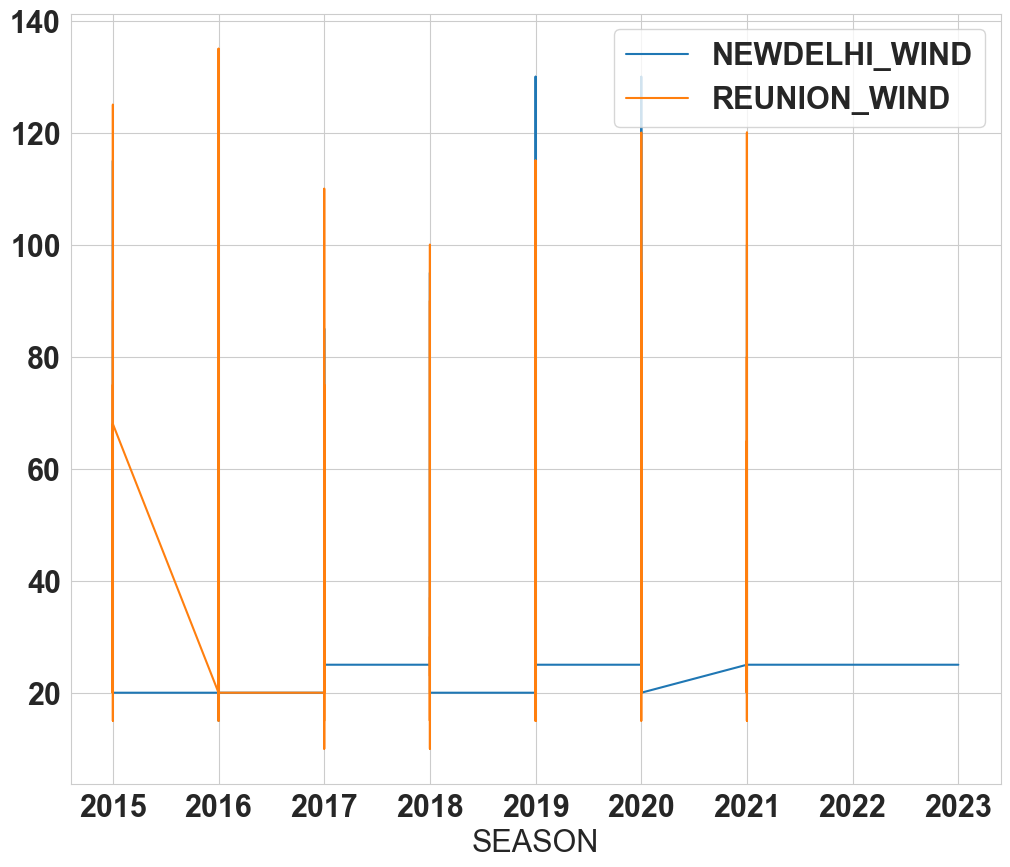

In [222]:
weather_merged_df[[quantitative[6] ,quantitative[9]]].plot(figsize=(12,10))

<Axes: xlabel='SEASON'>

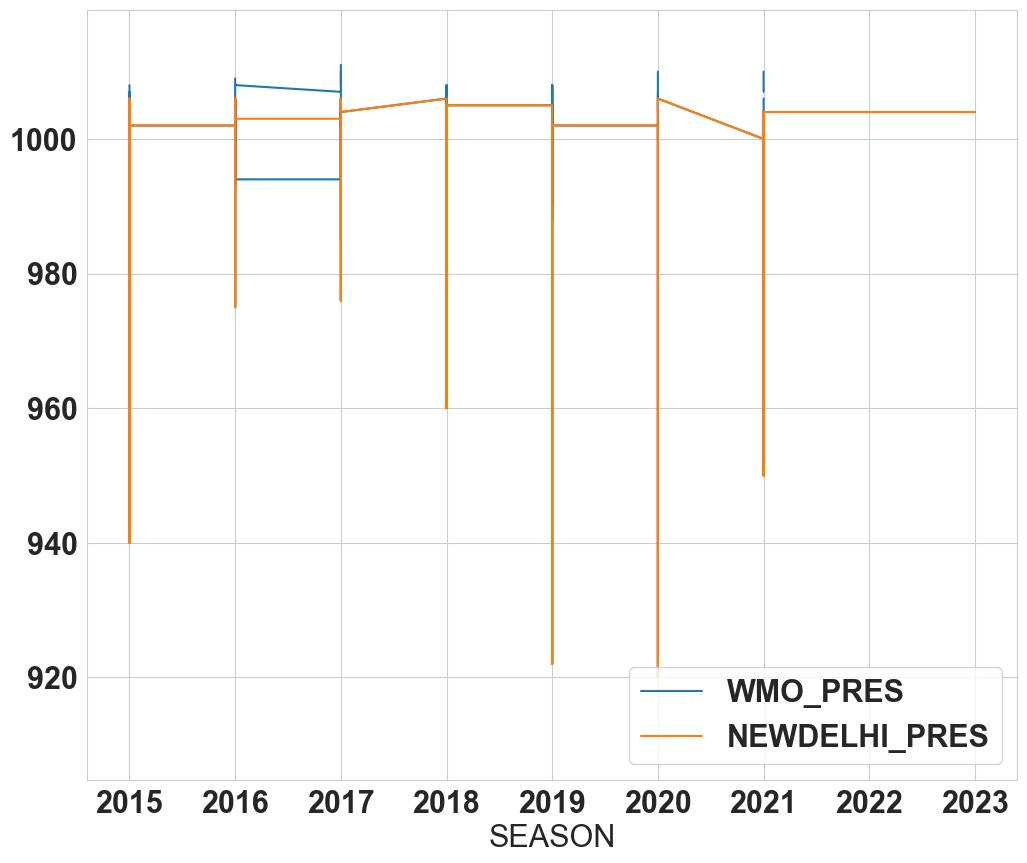

In [223]:
weather_merged_df[[quantitative[5] ,quantitative[7]]].plot(figsize=(12,10))

<Axes: xlabel='year'>

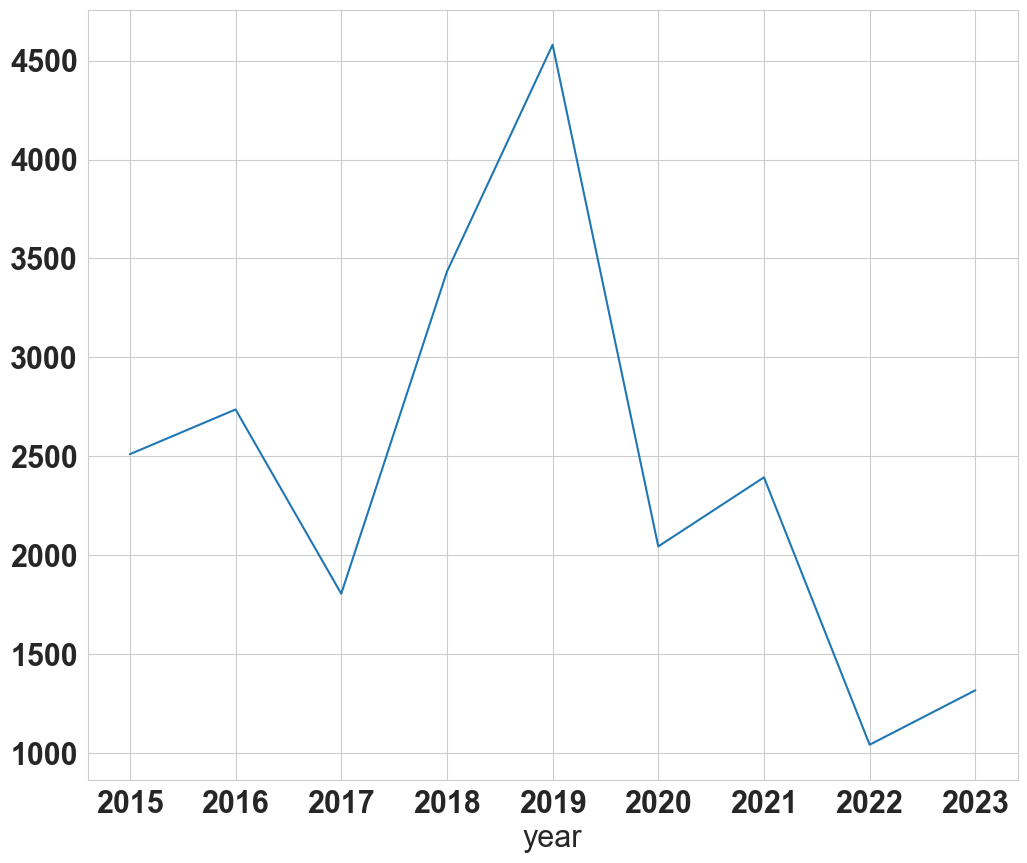

In [224]:
Weather_Analysis_NI_df1.groupby(Weather_Analysis_NI_df1['year']).apply(lambda x: x["STORM_SPEED"].sum()).plot(figsize=(12,10))

<Axes: xlabel='year'>

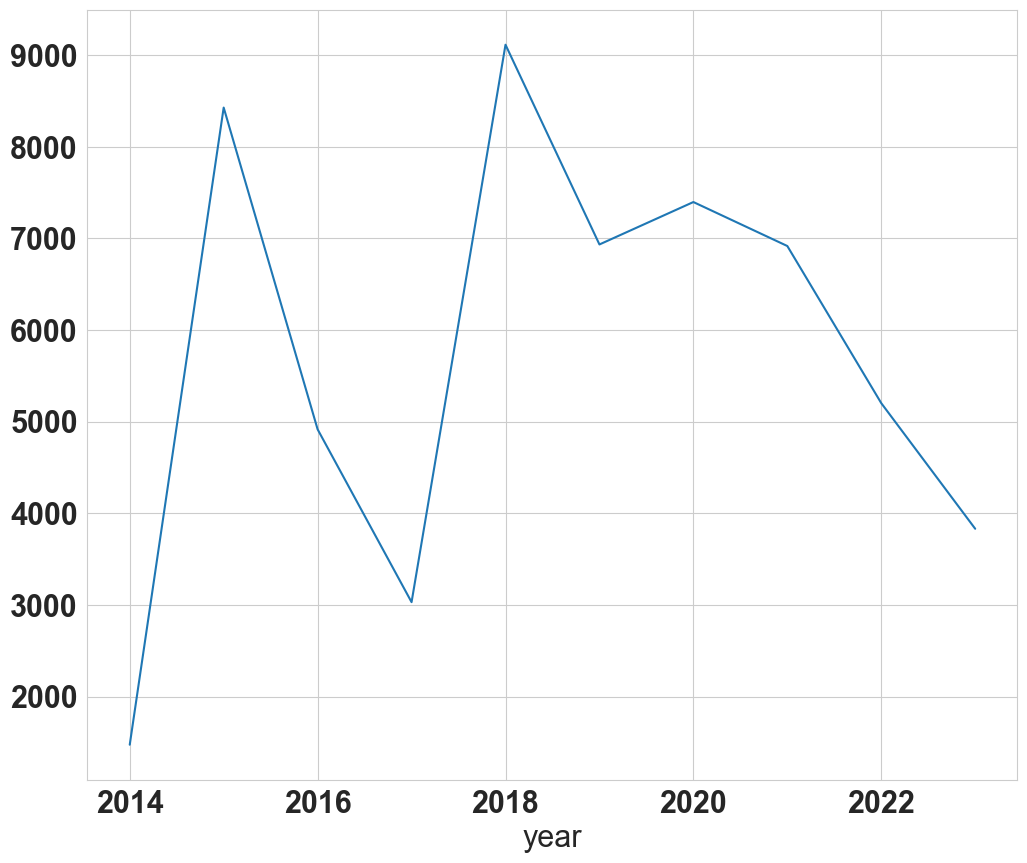

In [225]:
Weather_Analysis_SI_df1.groupby(Weather_Analysis_SI_df1['year']).apply(lambda x: x["STORM_SPEED"].sum()).plot(figsize=(12,10))

In [226]:
# Select columns you need
merged_data_df = weather_merged_df[['NAME', 'BASIN']]
# Group boroughs and crimes and count numbers
df_grouped = merged_data_df.groupby(['NAME', 'BASIN']).size().reset_index()
# Create a pivot table
table = pd.pivot_table(df_grouped, index=['BASIN'], columns=['NAME'])
# Delete columns with Nan values and convert to integers
table = table.fillna(value=0).astype(int)
table

0                                                                \
NAME  ABELA ADJALI ALCIDE ALICIA AMBALI AMPHAN ANA ANNABELLE ASANI ASHLEY   
BASIN                                                                       
NI        0      0      0      0      0     51   0         0    35      0   
SI       65     77     91     69     49      0  17        71     0     13   

       ...                                                                   
NAME   ... SAVANNAH SITRANG TAUKTAE TEJ TITLI URIAH VARDAH VAYU VERNON YAAS  
BASIN  ...                                                                   
NI     ...        0      11      49  31    40     0    103   77      0   39  
SI     ...       38       0       0   0     0    86      0    0      1    0  

[2 rows x 136 columns]

In [227]:
row_num = [1] # No. of the row
font_color = '#525252'
#colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']
values = table.iloc[row_num].values.tolist()[0] # crime numbers
print(values)
labels = [x[1] for x in table.columns] # crime names
print(labels)
title = table.iloc[row_num].index.values.tolist()[0] # borough

[65, 77, 91, 69, 49, 0, 17, 71, 0, 13, 0, 85, 8, 29, 86, 101, 75, 115, 0, 75, 101, 63, 35, 0, 0, 1, 139, 107, 125, 121, 0, 75, 101, 95, 27, 93, 107, 85, 47, 0, 37, 64, 61, 0, 47, 59, 27, 75, 25, 75, 129, 69, 65, 55, 79, 33, 73, 69, 51, 0, 129, 99, 86, 42, 101, 173, 55, 53, 75, 0, 0, 89, 86, 61, 93, 0, 119, 77, 67, 87, 0, 0, 71, 0, 101, 18, 73, 42, 39, 41, 0, 37, 125, 113, 57, 36, 8, 43, 78, 53, 0, 0, 0, 0, 69, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 13, 0, 38, 0, 0, 0, 0, 86, 0, 0, 1, 0]
['ABELA', 'ADJALI', 'ALCIDE', 'ALICIA', 'AMBALI', 'AMPHAN', 'ANA', 'ANNABELLE', 'ASANI', 'ASHLEY', 'ASHOBAA', 'AVA', 'BAKUNG', 'BALITA', 'BANSI', 'BATSIRAI', 'BELNA', 'BERGUITTA', 'BIPARJOY', 'BOHALE', 'BONGOYO', 'BOUCHRA', 'BRANSBY', 'BULBUL:MATMO', 'BUREVI', 'CALEB', 'CALVINIA', 'CARLOS', 'CEBILE', 'CHALANE', 'CHAPALA', 'CHEDZA', 'CHENESO', 'CILIDA', 'CLIFF', 'CORENTIN', 'DANILO', 'DARIAN', 'DAYA', 'DAYE', 'DESMOND', 'DIAMONDRA', 'DIANE', 'DIANMU', 'DINEO', 'DINGANI', 'DUMAKO', 'DU

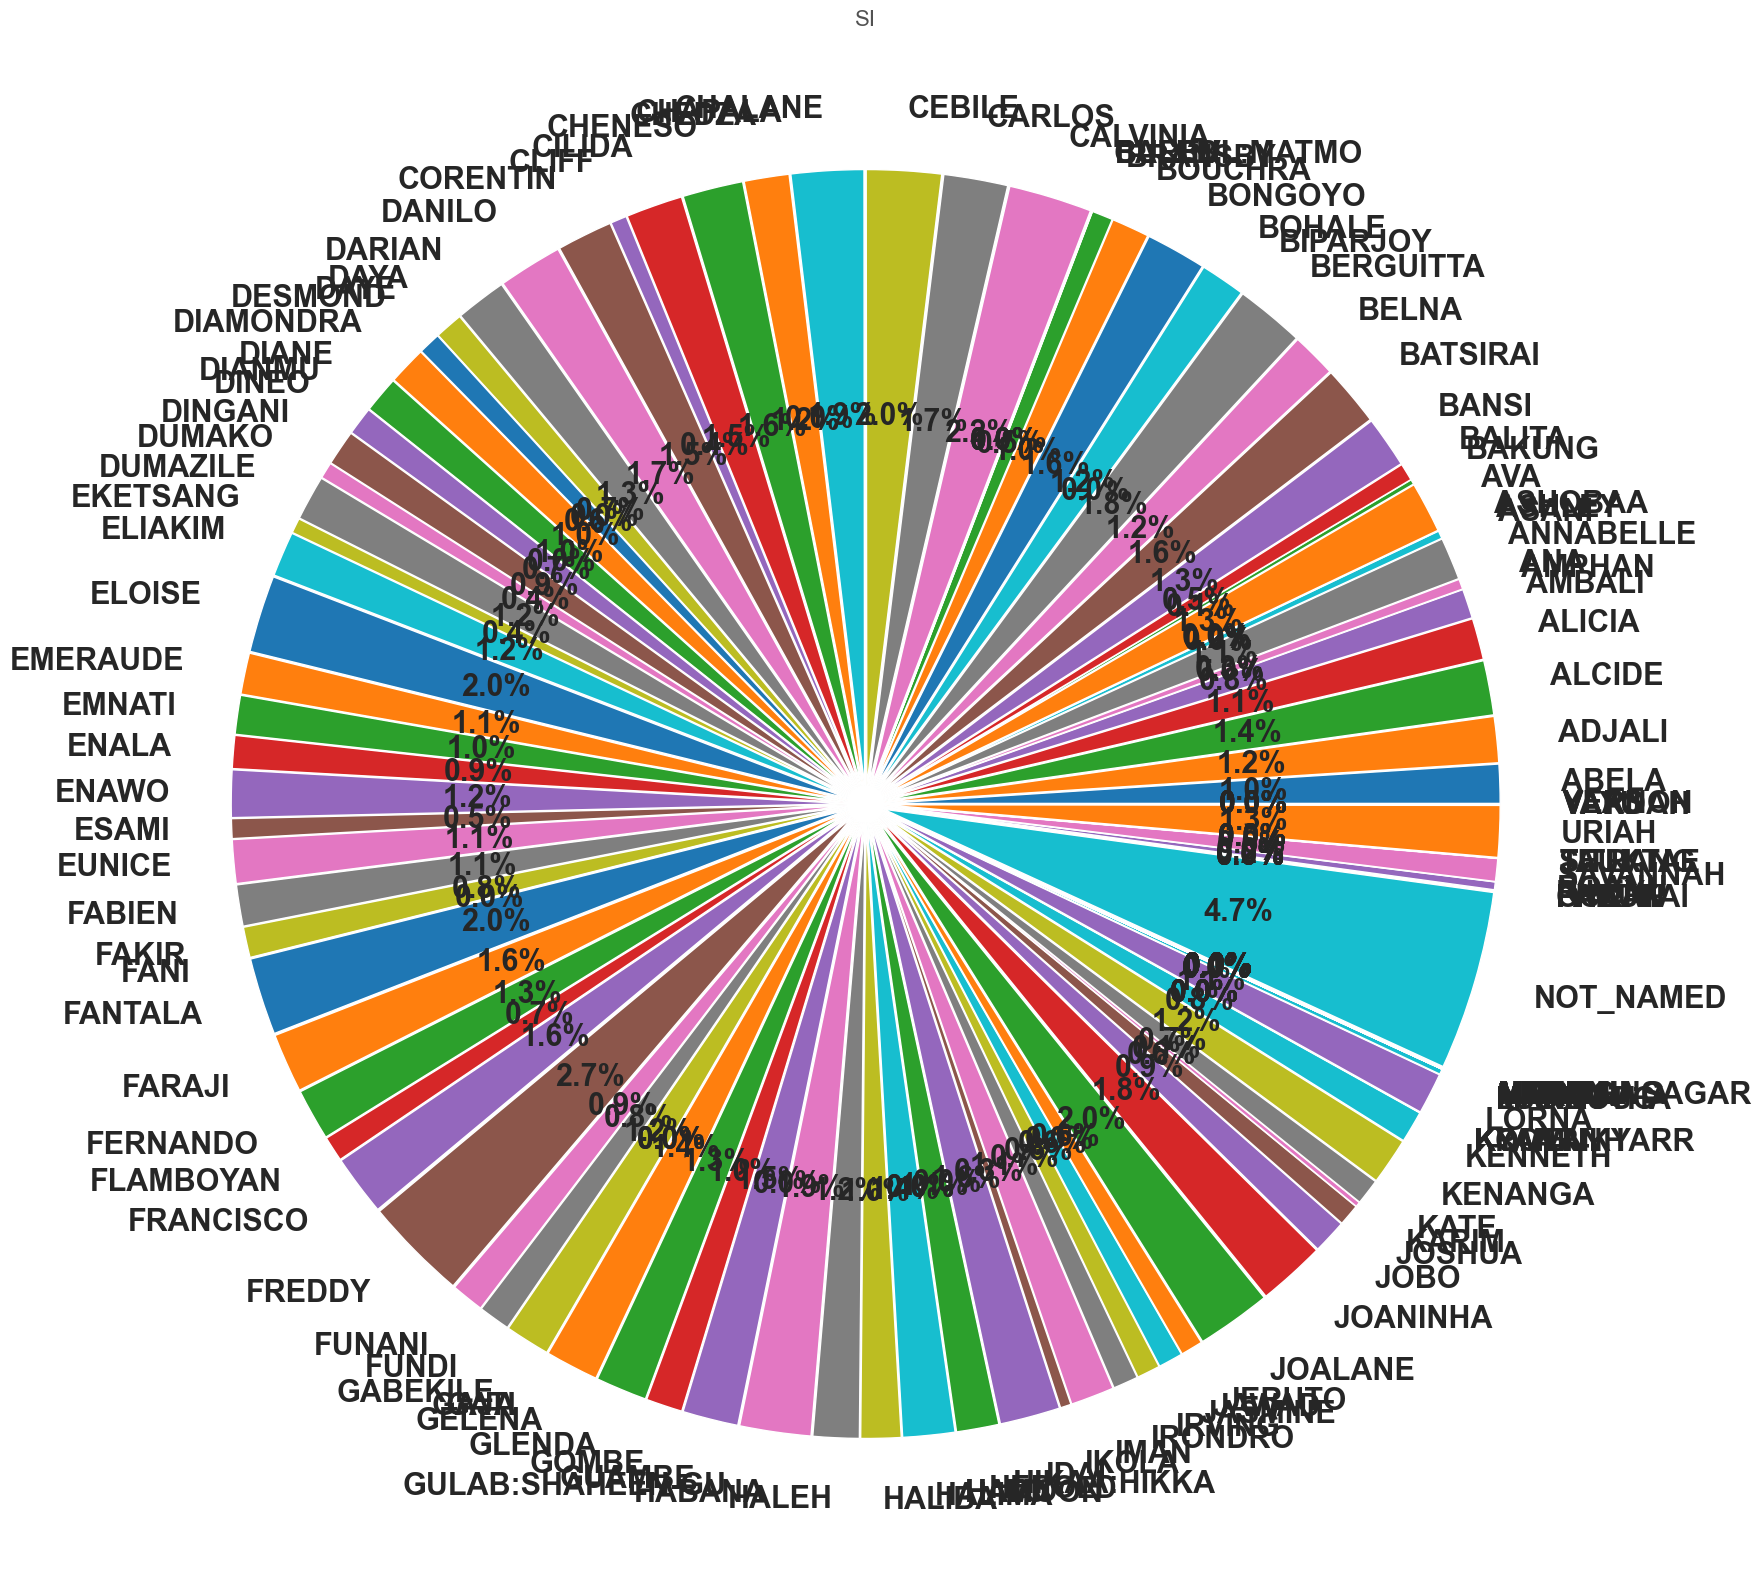

In [228]:
# fig , ax = plt.subplots(figsize=(10, 7), facecolor='#e8f4f0')
# fig.set_size_inches(30,20)
# ax.pie(labels = lst , x = val , autopct='%.1f%%' , explode = [0.03 for x in range(10)])
# plt.title(' Top  Tropical Cyclone by Frequency.' , fontsize = 30)
# plt.show()


# Create subplots and a pie chart
fig, ax = plt.subplots(figsize=(30, 20))
ax.pie(x= values, labels=labels,  autopct='%.1f%%', explode = [0.03 for x in values])
# Set title, its position, and font size
title = plt.title(title, fontsize=16, color=font_color)
title.set_position([.5, 1.02])
plt.rcParams['font.size'] = 16.0

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2790782459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_bar['month'] = merged_data_bar['Date'].apply(lambda x: x.month)
C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2790782459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_bar['year'] = merged_data_bar['Date'].apply(lambda x: x.year)
C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\2790782459.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

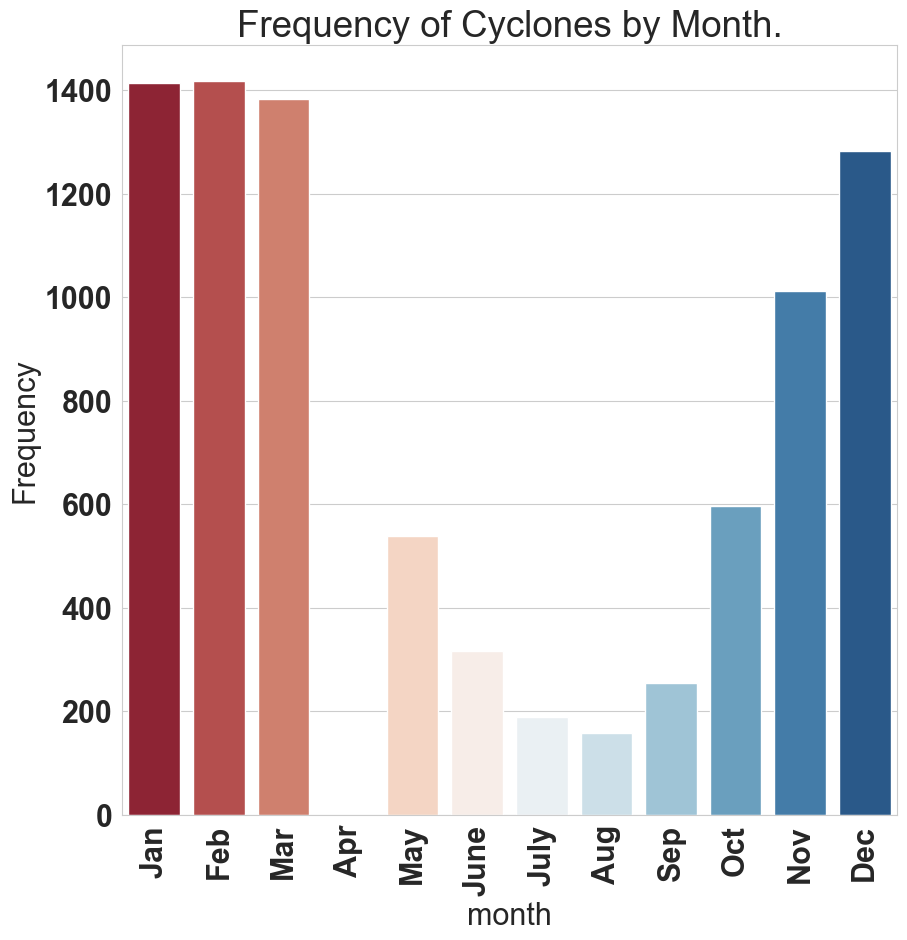

In [229]:
merged_data_bar = weather_merged_df[['NAME', 'BASIN','Date']]
merged_data_bar['month'] = merged_data_bar['Date'].apply(lambda x: x.month)
merged_data_bar['year'] = merged_data_bar['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = merged_data_bar.groupby('month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')


C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\1158097908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')


<Axes: xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

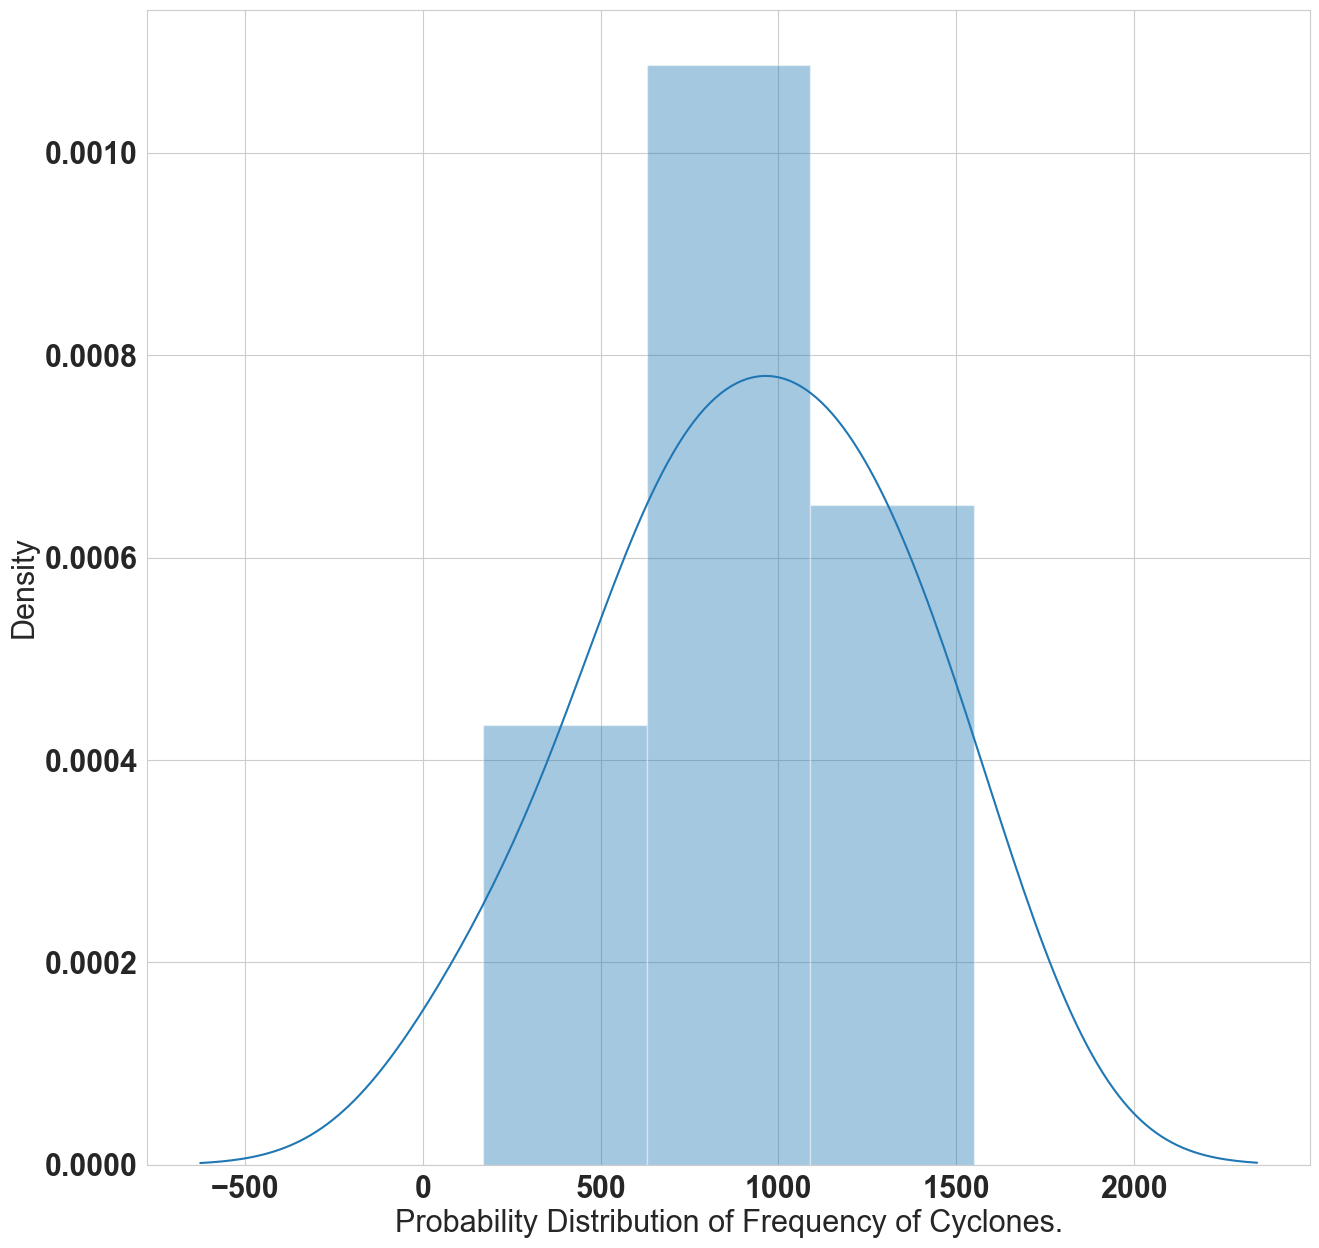

In [230]:

temp = weather_merged_df.groupby('year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

C:\Users\vivek\AppData\Local\Temp\ipykernel_7892\3986089800.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = list(temp.index) , x = 'year' , data = temp, palette= 'pastel' )


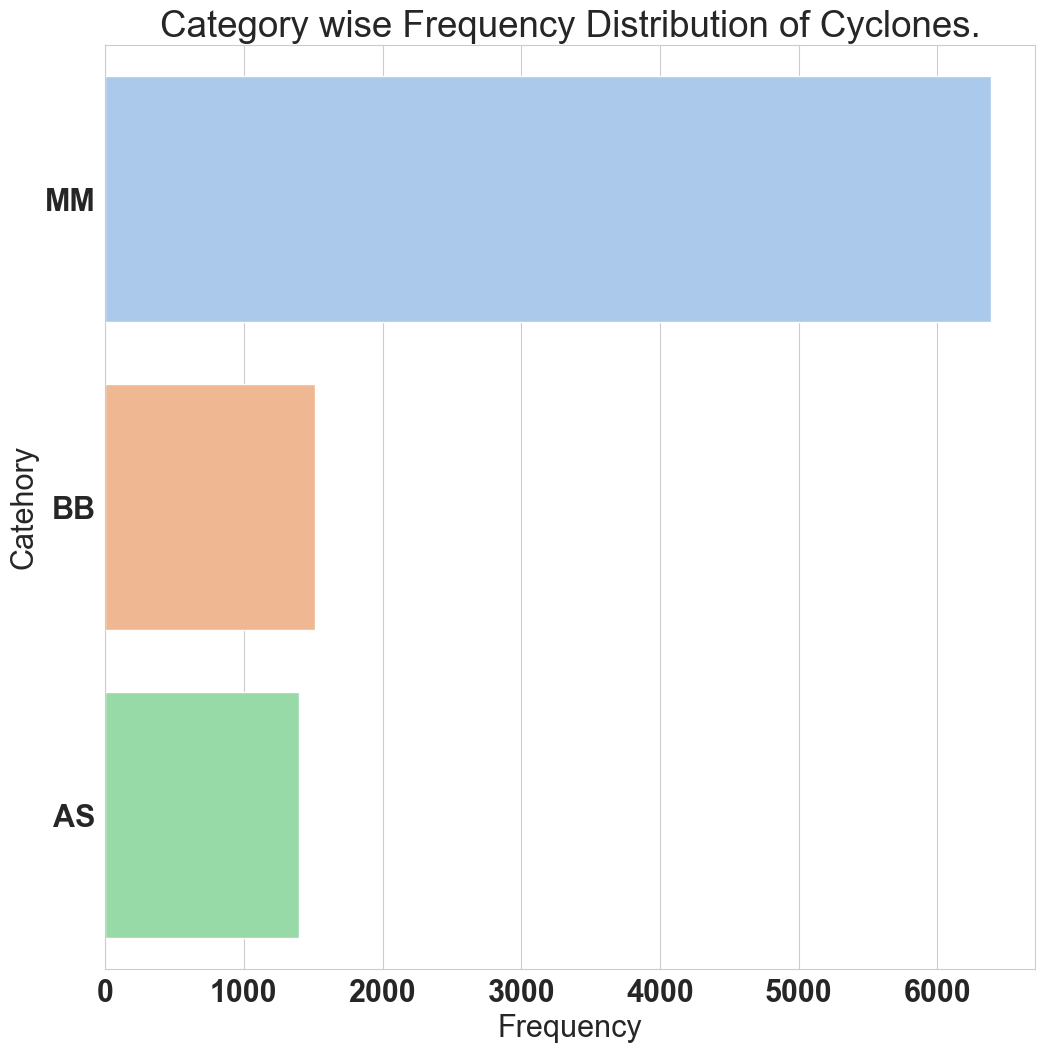

In [231]:
# Combined storm type.
# This is assigned based on all available storm types. They include:
# DS - Disturbance
# TS - Tropical
# ET - Extratropical
# SS - Subtropical
# NR - Not reported
# MX - Mixture (contradicting nature reports from different agencies)

temp = weather_merged_df.groupby('SUBBASIN').count().sort_values(by = 'year' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'year' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

In [232]:
weather_merged_df["target"] = weather_merged_df.shift(-1)["LANDFALL"]

In [234]:
weather_merged_df = weather_merged_df.fillna(value=0)

In [235]:
weather_merged_df = weather_merged_df.iloc[:-1,:].copy()

In [237]:
weather_merged_df.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour,target
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,0.0,0.0,...,0.0,7,8,2015-06-06 06:00:00,2015,6,6,06:00:00,6,584.0
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,0.0,0.0,...,0.0,7,8,2015-06-06 09:00:00,2015,6,6,09:00:00,9,571.0
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,0.0,0.0,...,0.0,7,3,2015-06-06 12:00:00,2015,6,6,12:00:00,12,551.0
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,0.0,0.0,...,0.0,7,0,2015-06-06 15:00:00,2015,6,6,15:00:00,15,538.0
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,0.0,0.0,...,0.0,7,358,2015-06-06 18:00:00,2015,6,6,18:00:00,18,523.0


In [238]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [239]:
quantitative = weather_merged_df.select_dtypes(include = ["int64","float64"]).keys()

In [240]:
weather_merged_df[quantitative].head()

,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,target
SEASON,,,,,,,,,,,,,,,
2015,13.10,68.5000,624,601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8,584.0
2015,13.45,68.5599,597,584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8,571.0
2015,13.80,68.6000,584,571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3,551.0
2015,14.15,68.6075,566,551.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,538.0
2015,14.50,68.6000,551,538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,358,523.0


In [241]:

predictors = ["DIST2LAND", "LANDFALL", "STORM_SPEED","STORM_DIR"]

 

In [242]:
train = weather_merged_df.iloc[:2022]
test = weather_merged_df.iloc[2023:]

In [243]:
train = train.fillna(value=0)

train

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour,target
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10000,68.5000,624,601.0,0.0,0.0,...,0.0,7,8,2015-06-06 06:00:00,2015,6,6,06:00:00,6,584.0
2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45000,68.5599,597,584.0,0.0,0.0,...,0.0,7,8,2015-06-06 09:00:00,2015,6,6,09:00:00,9,571.0
2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80000,68.6000,584,571.0,0.0,0.0,...,0.0,7,3,2015-06-06 12:00:00,2015,6,6,12:00:00,12,551.0
2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15000,68.6075,566,551.0,0.0,0.0,...,0.0,7,0,2015-06-06 15:00:00,2015,6,6,15:00:00,15,538.0
2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50000,68.6000,551,538.0,0.0,0.0,...,0.0,7,358,2015-06-06 18:00:00,2015,6,6,18:00:00,18,523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,NI,BB,AMPHAN,2020-05-15 18:00:00,9.50000,86.6000,569,559.0,25.0,1002.0,...,0.0,3,287,2020-05-15 18:00:00,2020,5,15,18:00:00,18,553.0
2020,NI,BB,AMPHAN,2020-05-15 21:00:00,9.58497,86.4500,563,553.0,25.0,1002.0,...,0.0,4,335,2020-05-15 21:00:00,2020,5,15,21:00:00,21,557.0
2020,NI,BB,AMPHAN,2020-05-16 00:00:00,9.84000,86.4400,562,557.0,25.0,1000.0,...,0.0,6,335,2020-05-16 00:00:00,2020,5,16,00:00:00,0,552.0


In [244]:
test = test.fillna(value=0)
test

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_RMW,STORM_SPEED,STORM_DIR,Date,year,month,day,Time,hour,target
SEASON,,,,,,,,,,,,,,,,,,,,,
2020,NI,BB,AMPHAN,2020-05-16 12:00:00,10.6000,86.1500,581,571.0,35.0,996.0,...,0.0,3,5,2020-05-16 12:00:00,2020,5,16,12:00:00,12,581.0
2020,NI,BB,AMPHAN,2020-05-16 15:00:00,10.7537,86.1250,581,581.0,40.0,995.0,...,0.0,3,351,2020-05-16 15:00:00,2020,5,16,15:00:00,15,586.0
2020,NI,BB,AMPHAN,2020-05-16 18:00:00,10.9000,86.1000,586,586.0,40.0,995.0,...,0.0,3,2,2020-05-16 18:00:00,2020,5,16,18:00:00,18,597.0
2020,NI,BB,AMPHAN,2020-05-16 21:00:00,11.0750,86.1250,597,597.0,45.0,994.0,...,0.0,3,0,2020-05-16 21:00:00,2020,5,16,21:00:00,21,603.0
2020,NI,BB,AMPHAN,2020-05-17 00:00:00,11.2000,86.1000,603,603.0,45.0,993.0,...,0.0,2,0,2020-05-17 00:00:00,2020,5,17,00:00:00,0,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,SI,MM,FABIEN,22-05-2023 03:00,-11.6200,68.9926,1537,1523.0,0.0,0.0,...,0.0,3,0,2023-05-22 03:00:00,2023,5,22,03:00:00,3,1502.0
2023,SI,MM,FABIEN,22-05-2023 06:00,-11.8000,69.0000,1523,1502.0,0.0,0.0,...,0.0,6,172,2023-05-22 06:00:00,2023,5,22,06:00:00,6,1483.0
2023,SI,MM,FABIEN,22-05-2023 09:00,-12.1850,69.0700,1503,1483.0,0.0,0.0,...,0.0,8,166,2023-05-22 09:00:00,2023,5,22,09:00:00,9,1479.0


In [245]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [246]:
predictions = reg.predict(test[predictors].astype("float64"))
print(predictions)

[ 565.31764239  585.20180282  593.3535591  ... 1459.47125555 1474.06871012
 1470.06741832]


In [247]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

138503.25745599804

In [248]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [249]:
combined

,actual,predictions
SEASON,,
2020,581.0,565.317642
2020,586.0,585.201803
2020,597.0,593.353559
2020,603.0,604.238652
2020,609.0,608.590196
...,...,...
2023,1502.0,1500.549774
2023,1483.0,1473.715269
2023,1479.0,1459.471256


<Axes: xlabel='SEASON'>

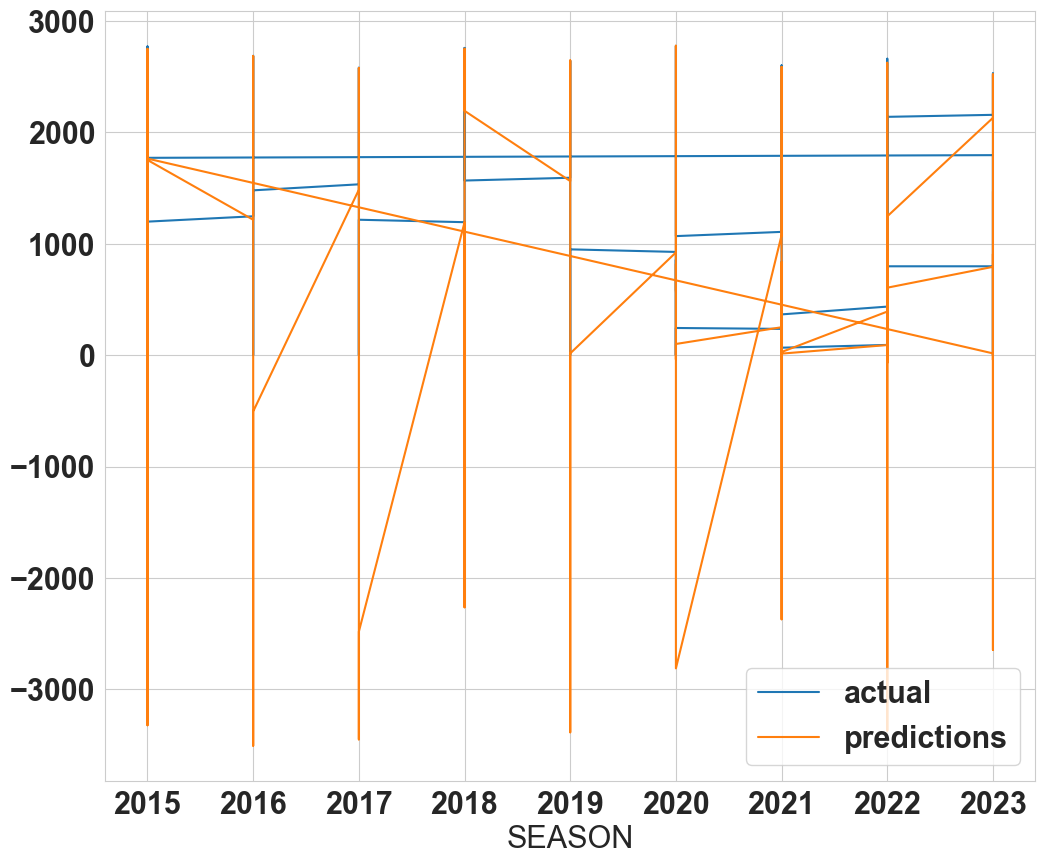

In [250]:
combined.plot(figsize=(12,10))

In [251]:
reg.coef_

array([-1.31900972,  2.30689013,  1.5757391 , -0.00920445])

In [252]:

weather_merged_df["Yearly_landfall"] = weather_merged_df["LANDFALL"].rolling(12).mean()
weather_merged_df["Yearly_landfall"] = weather_merged_df["Yearly_landfall"].round(decimals=3)

weather_merged_df["yearly_by_month"] = (weather_merged_df["Yearly_landfall"] / weather_merged_df["LANDFALL"]).astype("float64")
weather_merged_df["yearly_by_month"] = weather_merged_df["yearly_by_month"].round(decimals=3)

In [254]:
weather_merged_df  = weather_merged_df.fillna(value=0)


In [255]:
weather_merged_df = weather_merged_df.iloc[30:,:].copy()

weather_merged_df.head()

,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,STORM_DIR,Date,year,month,day,Time,hour,target,Yearly_landfall,yearly_by_month
SEASON,,,,,,,,,,,,,,,,,,,,,
2015,NI,AS,ASHOBAA,2015-06-10 00:00:00,21.1500,62.0000,253,240.0,45.0,990.0,...,267,2015-06-10 00:00:00,2015,6,10,00:00:00,0,222.0,383.583,1.598
2015,NI,AS,ASHOBAA,2015-06-10 03:00:00,21.1287,61.7525,240,222.0,45.0,990.0,...,263,2015-06-10 03:00:00,2015,6,10,03:00:00,3,202.0,363.250,1.636
2015,NI,AS,ASHOBAA,2015-06-10 06:00:00,21.1000,61.5500,222,202.0,45.0,990.0,...,257,2015-06-10 06:00:00,2015,6,10,06:00:00,6,202.0,341.417,1.690
2015,NI,AS,ASHOBAA,2015-06-10 09:00:00,21.0287,61.2887,202,202.0,45.0,990.0,...,250,2015-06-10 09:00:00,2015,6,10,09:00:00,9,191.0,319.583,1.582
2015,NI,AS,ASHOBAA,2015-06-10 12:00:00,21.0000,61.2500,202,191.0,45.0,990.0,...,218,2015-06-10 12:00:00,2015,6,10,12:00:00,12,197.0,296.833,1.554


In [256]:
def create_predictions(predictors, weather_merged_df, reg):
    train = weather_merged_df.iloc[:2022]
    test = weather_merged_df.iloc[2023:]
    train = train.fillna(value=0)
    test = test.fillna(value=0)
    print(train["target"])
    print(test["target"])
    print(train[predictors])
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    
    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [261]:
predictors = ["DIST2LAND", "LANDFALL", "STORM_SPEED", "STORM_DIR","Yearly_landfall", "yearly_by_month"].v


AttributeError: 'list' object has no attribute 'a'

In [259]:
error, combined = create_predictions(predictors, weather_merged_df, reg)
error

SEASON
2015    222.0
2015    202.0
2015    202.0
2015    191.0
2015    197.0
        ...  
2020    207.0
2020    167.0
2020    153.0
2020    118.0
2020     96.0
Name: target, Length: 2022, dtype: float64
SEASON
2020       0.0
2020       0.0
2020       0.0
2020       0.0
2020       0.0
         ...  
2023    1502.0
2023    1483.0
2023    1479.0
2023    1478.0
2023       0.0
Name: target, Length: 7246, dtype: float64
        DIST2LAND  LANDFALL  STORM_SPEED  STORM_DIR  Yearly_landfall  \
SEASON                                                                 
2015          253     240.0            5        267          383.583   
2015          240     222.0            4        263          363.250   
2015          222     202.0            4        257          341.417   
2015          202     202.0            3        250          319.583   
2015          202     191.0            3        218          296.833   
...           ...       ...          ...        ...              ...   
2020 

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
combined.plot(figsize=(12,10))